In [1]:
from importlib import reload

import numpy as np
import json
import pandas as pd
import matplotlib.pyplot as plt
from time import time
from mandelbrot_matrix import SEED, random_mandelbrot_points

save_files = False

# reload(mandelbrot_matrix)

plt.style.use('seaborn')

re_lim=(-2,1) 
im_lim=(-1.25,1.25)

theta = 1.506793
run_full = False

In [14]:
from simulation_functions import get_confidence_interval

In [2]:
from sampling_functions import generate_pureRandomSample, generate_latinHyperCube, generate_Orthogonal
from simulation_functions import compare_sampling_functions, get_confidence_interval

test_functions = [generate_pureRandomSample,generate_latinHyperCube, generate_Orthogonal]

n_simulations = 1000
threshold = 1000
n_samples = 144

results = [] 
results_data = []

for sampling_function in test_functions:
    result, data = compare_sampling_functions(sampling_function,
                                              n_simulations=n_simulations,
                                              threshold=threshold,
                                              n_points=n_samples)
    results.append(result)
    results_data.append(data)
    result.explain()

Running simulation for generate_pureRandomSample:


100%|██████████| 1000/1000 [00:16<00:00, 60.61it/s]


Result of simulation for generate_pureRandomSample: 
                 n_sims 	| 	 1000 
                    mean 	| 	 1.5180 
                    std 	| 	 0.249 
                    comp. time	| 	 16 s 
                    conf. int.	| 	 0.0154 
                    conf % 	| 	 95.0 
                  
Running simulation for generate_latinHyperCube:


100%|██████████| 1000/1000 [00:15<00:00, 63.78it/s]


Result of simulation for generate_latinHyperCube: 
                 n_sims 	| 	 1000 
                    mean 	| 	 1.5040 
                    std 	| 	 0.1683 
                    comp. time	| 	 16 s 
                    conf. int.	| 	 0.0104 
                    conf % 	| 	 95.0 
                  
Running simulation for generate_Orthogonal:


100%|██████████| 1000/1000 [00:16<00:00, 60.34it/s]

Result of simulation for generate_Orthogonal: 
                 n_sims 	| 	 1000 
                    mean 	| 	 1.5050 
                    std 	| 	 0.1015 
                    comp. time	| 	 16 s 
                    conf. int.	| 	 0.00629 
                    conf % 	| 	 95.0 
                  


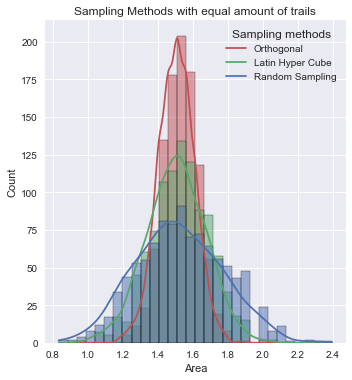

In [3]:
import seaborn as sns

df = pd.DataFrame(np.transpose(results_data), columns=[str(r.funct).removeprefix("generate_") for r in results],)
fig = sns.displot(df,bins=30 ,kde=True, legend=False,)
# fig.set_axis_labels(x_var="area")
plt.legend(labels=["Orthogonal", "Latin Hyper Cube","Random Sampling"],loc=1, title="Sampling methods", 
           fontsize = 'medium', title_fontsize = "12")
plt.title("Sampling Methods with equal amount of trails")
plt.xlabel("Area")
# plt.savefig(f"figures/dist_comp_of_sampling_nsims={n_simulations}", dpi=600)


In [4]:
import json
dict_array = [res.dict() for res in results]
# with open("simulation_data/d_c_of_s_nsims=1000-V1.json", mode="a") as fp:
#     json.dump(dict_array, fp)

# calculating the confidence interval for different sampling functions

In [ ]:
from sampling_functions import generate_pureRandomSample, generate_latinHyperCube, generate_Orthogonal
from simulation_functions import test_sampling_function
test_functions = [generate_pureRandomSample,generate_latinHyperCube, generate_Orthogonal]

samplestep = 100
max_a = 0.005 * theta
threshold = 1000
n_points = 144
results =[]
results_data = []

np.random.seed(SEED) # type: ignore
for sampling_function in test_functions:
    result, data = test_sampling_function(sampling_function, 
                                    samplestep=samplestep,
                                    max_a=max_a,
                                    threshold=threshold,
                                    n_points=n_points, 
                                    )
    results.append(result)
    results_data.append(data)
    result.explain()

In [27]:
import json
# dict_array = [res.dict() for res in results]
# with open("simulation_data/results_a=001theta.json", mode="a") as fp:
#     json.dump(dict_array, fp)

/usr/local/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.9/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/usr/local/lib/python3.9/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


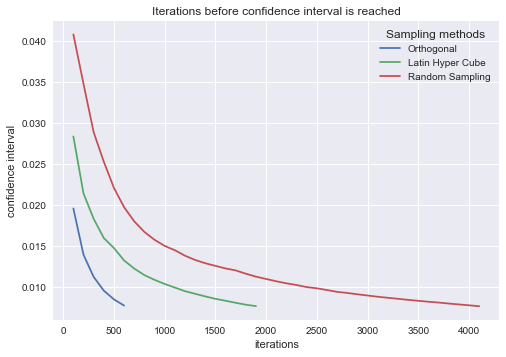

In [26]:
# plotting the confidence interval with respect to the number of itterations
std_data = []
std_xaxis = []
for data in results_data:
    std_i = []
    xaxis_i = []
    data = np.array(data).flatten()
    
    for i in range(int(len(data)/samplestep)):
        xaxis_i.append(i*samplestep)
        
        std_i.append(get_confidence_interval(1.96, np.std(data[:i*samplestep]), i*samplestep))
    
    std_xaxis.append(xaxis_i)
    std_data.append(std_i)

for i in range(len(std_data)):
    plt.plot(std_xaxis[i], std_data[i])

plt.ylabel("confidence interval")
plt.xlabel("iterations")
plt.legend(labels=["Orthogonal", "Latin Hyper Cube","Random Sampling"],loc=1, title="Sampling methods", 
           fontsize = 'medium', title_fontsize = "12")
plt.title("Iterations before confidence interval is reached")
# plt.savefig("figures/speed_comparison_confidence_interval.png", dpi=600)